In [0]:
#Priya Rajpurohit 2015073
#Sakshi Saini 2017092

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
import keras.backend as K

from keras.models import Model
import cv2 
import numpy as np 
from keras import backend as K 
from keras.utils import np_utils

import math 
from sklearn.model_selection import train_test_split



Using TensorFlow backend.


In [0]:
ds, ds_info = tfds.load("plant_village", split=tfds.Split.TRAIN, batch_size=-1 , with_info=True )


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/plant_village/1.0.0.incompleteW0YORG/plant_village-train.tfrecord


Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.0. Subsequent calls will reuse this data.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
y = pd.read_csv("/content/drive/My Drive/SML/labels.csv") 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


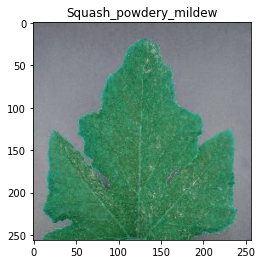

In [0]:
ds = tfds.as_numpy(ds)
images, labels = ds["image"], ds["label"]

index = 10
image = images[index]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(y['label_name'][labels[index]])
plt.show()

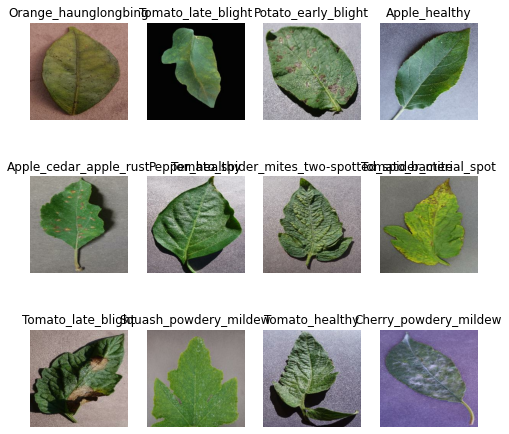

In [0]:
## Colored images 

fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    image = images[i]
    fig.add_subplot(rows, columns, i)
    plt.title(y['label_name'][labels[i]])
    plt.axis('off')
    plt.imshow(image)
plt.show()

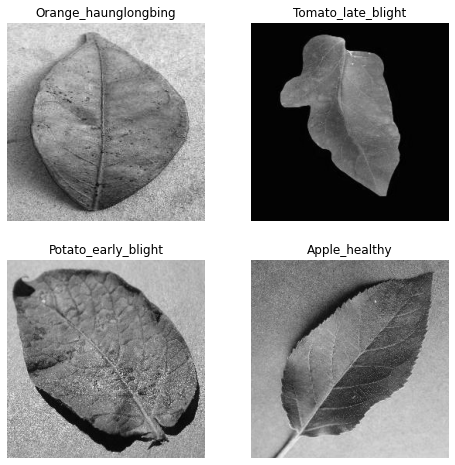

In [0]:
## Gray Scale images 

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2

for i in range(1, columns*rows +1):
    image = images[i]
    image  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    fig.add_subplot(rows, columns, i)
    plt.title(y['label_name'][labels[i]])
    plt.axis('off')
    plt.imshow(image, cmap = "gray")
plt.show()

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive1 = GoogleDrive(gauth)


In [0]:
link = 'https://drive.google.com/open?id=10fFInHmGZ5PsbMTRb_7EuhJcGNHisjCi'
fluff, id = link.split('=')

downloaded = drive1.CreateFile({'id':id}) 
downloaded.GetContentFile('Segmented.zip')

from zipfile import ZipFile

with ZipFile('/content/Segmented.zip', 'r') as zipObj:
   zipObj.extractall()

In [0]:
import os
path = '/content/Segmented/'
images=[]
lable = 1
labels = []
for r, d, f in os.walk(path):
    for folder in d:
        
        for r1, d1, f1 in os.walk(os.path.join(r, folder)):
          for file in f1:
            # print(file)
            images.append( cv2.imread(os.path.join(r1, file) ))
            labels.append(lable)

          lable = lable +1


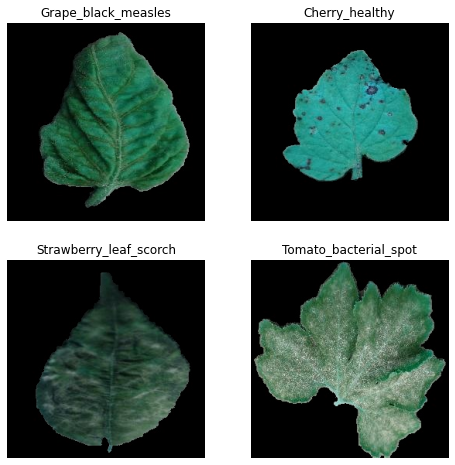

In [0]:
### Segmented 
from random import randint
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2

n = len(images)

for i in range(1, columns*rows +1):
    value = randint(0, n)
    image = images[value]
    fig.add_subplot(rows, columns, i)
    plt.title(y['label_name'][labels[value]])
    plt.axis('off')
    plt.imshow(image)
plt.show()

In [0]:
## extracting the channel colors 

subImages = images[:1000]

redDist = []
greenDist = []
blueDist = []
avgDist = []
n = subImages.shape[0]

for i in range(n):

  image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

  redDist.append( np.mean( image[:, :, 0] ))
  blueDist.append(np.mean( image[:, :, 1] ))
  greenDist.append(np.mean(image[:, :, 2] ))
  avgDist.append(np.mean(image))

In [0]:
import plotly.figure_factory as ff

In [0]:
redDist = np.array(redDist)
redDist.shape

figure = ff.create_distplot( [redDist] , group_labels=["Red"], colors=["red"])

figure.update_layout(template="simple_white")
figure.update_layout(title_text="Red Channel Distribution")

figure.data[0].marker.line.width = 0.5
figure

In [0]:
blueDist = np.array(blueDist)

figure = ff.create_distplot( [blueDist] , group_labels=["Blue"], colors=["blue"])

figure.update_layout(template="simple_white")
figure.update_layout(title_text="Blue Channel Distribution")

figure.data[0].marker.line.width = 0.5
figure


In [0]:
greenDist = np.array(greenDist)

figure = ff.create_distplot( [greenDist] , group_labels=["Green"], colors=["green"])

figure.update_layout(template="simple_white")
figure.update_layout(title_text="Green Channel Distribution")

figure.data[0].marker.line.width = 0.5
figure

In [0]:
figure = ff.create_distplot( [redDist, blueDist, greenDist] , group_labels=["Red", "Blue","Green"], colors=["red","blue","green"])

figure.update_layout(template="simple_white")
figure.update_layout(title_text="Channel Distribution")

figure.data[0].marker.line.width = 0.5
figure


In [0]:
greenDist = np.array(avgDist)

figure = ff.create_distplot( [avgDist] , group_labels=["Average"], colors=["orange"])

figure.update_layout(template="simple_white")
figure.update_layout(title_text="Average Channel Distribution")

figure.data[0].marker.line.width = 0.5
figure
